<a href="https://colab.research.google.com/github/Rubab-Qaiser/my-first-project/blob/main/Medical_Expense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [4]:
from urllib.request import urlretrieve

In [5]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7eaa27aa8860>)

In [6]:
!pip install pandas --quiet

In [7]:
import pandas as pd
medical_df=pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.info()        #information about column(like what do each col contain)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
!pip install jovian --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.1 MB/s eta 0:00:00


In [11]:
import os
print(os.listdir())

['.config', 'medical.csv', 'sample_data']


In [13]:
!pip install jovian --quiet
import jovian
jovian.commit(
    project='medical-bill-analysis'
)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [14]:
!pip install plotly matplotlib seaborn --quiet

In [15]:
import plotly.express as px
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

specific style

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

min age=18, max=64, we want to see how many people of each  age are present, 64-18=47

In [17]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [19]:
from IPython.core.display import update_display
fig=px.histogram(medical_df,
                 x='age',
                 marginal='box',
                 nbins=47,
                 title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
fig=px.histogram(medical_df,
                x='bmi',
                marginal='box',
                color_discrete_sequence=['red'],
                title='Distribution OF BMI')
fig.update_layout(bargap=0.1)
fig.show()


In [24]:
fig=px.histogram(medical_df,
                 x='charges',
                 marginal='box',
                 color='smoker',
                 color_discrete_sequence=['green','brown'],
                 title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()


In [27]:
fig=px.histogram(medical_df,
                 x='sex',
                 marginal='box',
                 color='region',
                 color_discrete_sequence=['pink','blue','purple','orange'],
                 title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()


In [28]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [29]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [31]:
px.histogram(medical_df, x='region', color='sex',title='Region')

In [32]:
px.histogram(medical_df, x='children', color='sex', title='Children')

relationship between charges and age

In [37]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='sex',
               marginal_x='box',
               marginal_y='box',
               opacity=0.8,
               hover_data=['sex'],
               title='Annual Medical Charges vs Age')
fig.update_layout(bargap=0.1)
fig.show()

In [41]:
fig=px.violin(medical_df,
               x='bmi',
               y='age',
               color='smoker',
               #opacity=0.8,
               hover_data=['sex'],
               title='BMI vs Age')
fig.update_layout(bargap=0.1)
fig.show()

AttributeError: 'Axes' object has no attribute 'update_layout'

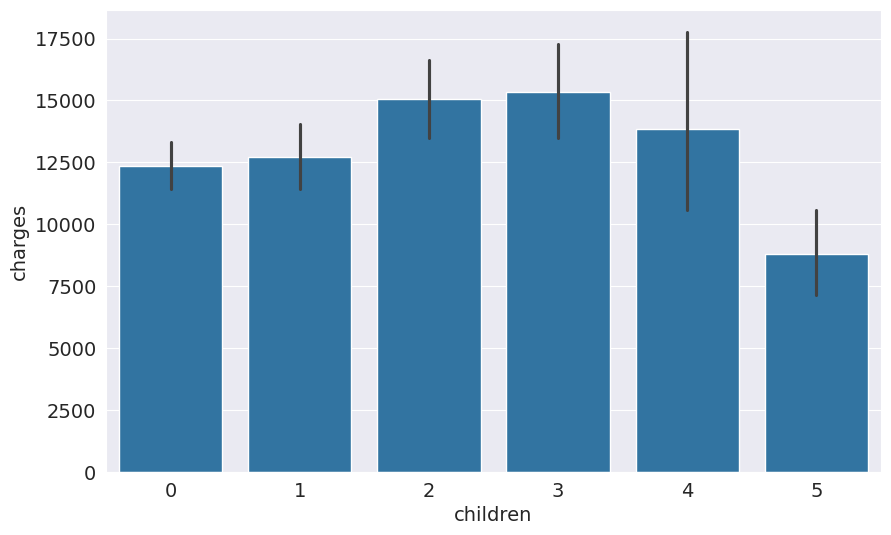

In [45]:
fig=sns.barplot(medical_df,
                x='children',
                y='charges',
                )
fig.update_layout(bargap=0.1)
fig.show()

In [46]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [53]:
smoker_values={'no':0,'yes':1}
s_numeric=medical_df.smoker.map(smoker_values)
s_numeric

,smoker
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1333,NaN
1334,NaN
1335,NaN
1336,NaN


In [51]:
medical_df.smoker

,smoker
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1333,NaN
1334,NaN
1335,NaN
1336,NaN


In [47]:
smoker_values={'no':0,'yes':1}
medical_df.smoker=medical_df.smoker.map(smoker_values)
medical_df.charges.corr(medical_df.smoker)

np.float64(0.787251430498478)

In [50]:
medical_df.corr()

ValueError: could not convert string to float: 'female'